In [2]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_variance computes the autcovariance function

Text(0,0.5,'magnitud')

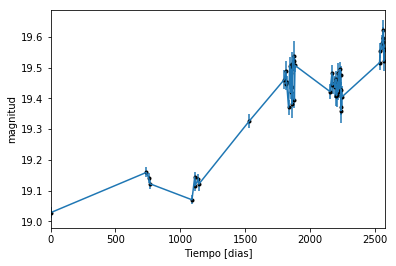

In [3]:
data = np.genfromtxt('LC_i_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

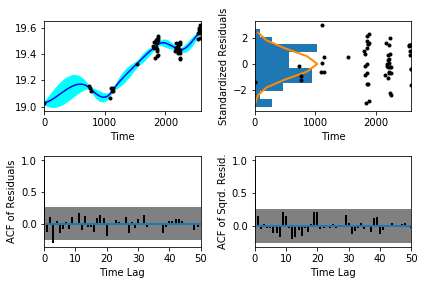

In [5]:
sample.assess_fit()

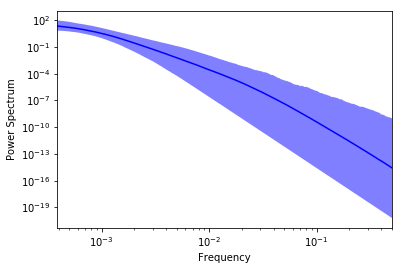

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)


Text(0.00048394,0.0487207,'Nivel de ruido')

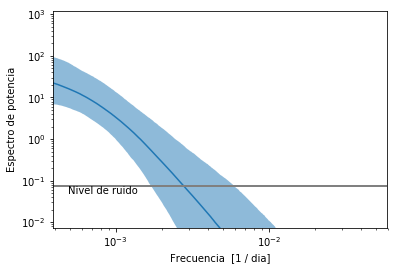

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [9]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [10]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [11]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 337.30876591
Median: 0.0
Standard deviation: 0.143677301198
68% credibility interval: [ 0.          0.03673053]
95% credibility interval: [ 0.          0.57760851]
99% credibility interval: [ 0.          0.87706315]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 337.30876591
Median: 0.0
Standard deviation: 0.143677301198
68% credibility interval: [ 0.          0.03673053]
95% credibility interval: [ 0.          0.57760851]
99% credibility interval: [ 0.          0.87706315]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 818.36619058
Median: 0.0
Standard deviation: 0.0001649719143
68% credibility interval: [ 0.     

Plotting parameter summary


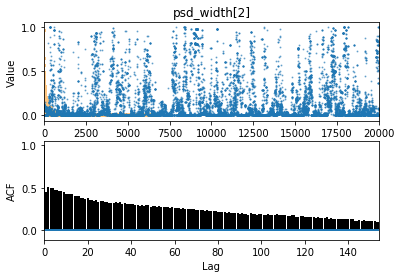

In [13]:
sample.plot_parameter('psd_width', 2, doShow=True)

In [14]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1592.08344109
Median: 111.124944777
Standard deviation: 1.63827171337
68% credibility interval: [ 109.26086595  112.29021015]
95% credibility interval: [ 106.75757008  112.91165893]
99% credibility interval: [ 104.67598793  113.1497495 ]


In [16]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 451.027093
Median: 0.5481512216
Standard deviation: 1.95566524601
68% credibility interval: [ 0.05546328  3.22675547]
95% credibility interval: [ 0.0141367   6.69232255]
99% credibility interval: [  0.01104119  10.39353787]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1084.18766572
Median: 0.0537738667283
Standard deviation: 5.18589777161
68% credibility interval: [ 0.00217628  1.63661059]
95% credibility interval: [  1.75941363e-04 

In [18]:
 centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4744.79675551
Median: 4.89416649484e-39
Standard deviation: 1.13259395507e+76
68% credibility interval: [  4.53997509e-69   7.75880749e-14]
95% credibility interval: [  1.39415005e-107   2.45841155e-001]
99% credibility interval: [  1.12675730e-111   3.65521112e+001]


In [20]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1346.36216811
Median: 19.2853991875
Standard deviation: 0.131424120649
68% credibility interval: [ 19.17184644  19.39764255]
95% credibility interval: [ 19.01797837  19.54786134]
99% credibility interval: [ 18.86983938  19.68513447]


In [22]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 337.30876591
Median: 0.0
Standard deviation: 0.143677301198
68% credibility interval: [ 0.          0.03673053]
95% credibility interval: [ 0.          0.57760851]
99% credibility interval: [ 0.          0.87706315]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 337.30876591
Median: 0.0
Standard deviation: 0.143677301198
68% credibility interval: [ 0.          0.03673053]
95% credibility interval: [ 0.          0.57760851]
99% credibility interval: [ 0.          0.87706315]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 818.36619058
Median: 0.0
Standard deviation: 0.0001649719143
68% credibility interval: [ 0.     

In [24]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [25]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1592.08344109
Median: 111.124944777
Standard deviation: 1.63827171337
68% credibility interval: [ 109.26086595  112.29021015]
95% credibility interval: [ 106.75757008  112.91165893]
99% credibility interval: [ 104.67598793  113.1497495 ]


In [26]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [27]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 536.44612268
Median: 0.00997851489231
Standard deviation: 0.186662031205
68% credibility interval: [ 0.00066511  0.17997063]
95% credibility interval: [  4.13045072e-04   7.58566448e-01]
99% credibility interval: [  3.88995344e-04   9.37279234e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 596.478695879
Median: 0.000668725452118
Standard deviation: 0.051278278889
68% credibility interval: [ 0.00043985  0.00427431]
95% credibility interval: [ 0.00039272  0.13057199]
99% credibility interval: [ 0.00038814  0.36732234]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 649.387295604
Median: 0.014819811004
Standard deviation: 

In [28]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [29]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1113.91625339
Median: 0.0438119905864
Standard deviation: 0.0601430161028
68% credibility interval: [ 0.02502382  0.08546623]
95% credibility interval: [ 0.01539017  0.1882329 ]
99% credibility interval: [ 0.01140067  0.32470023]


In [30]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [31]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1331.78527023
Median: 1.43691104072
Standard deviation: 0.205090055208
68% credibility interval: [ 1.24517489  1.65914115]
95% credibility interval: [ 1.07825102  1.88864702]
99% credibility interval: [ 0.99216374  1.96804364]


In [32]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [33]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1607.17941965
Median: 5.17450535201e-06
Standard deviation: 0.0248298251356
68% credibility interval: [  1.37478067e-07   1.97629234e-04]
95% credibility interval: [  7.03346148e-09   2.71292191e-03]
99% credibility interval: [  3.19966123e-09   4.95054696e-02]


In [34]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [35]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 536.44612268
Median: (-0.0626968581589+0j)
Standard deviation: 1.48003201732
68% credibility interval: [-1.13078879+0.j         -0.00417903-0.00090726j]
95% credibility interval: [ -4.76621356e+00+0.j          -2.59523872e-03-0.00322319j]
99% credibility interval: [ -5.88909911e+00+0.j          -2.44412983e-03-0.00340708j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 596.478695879
Median: (-0.00420172593529+0j)
Standard deviation: 0.958523112474
68% credibility interval: [-0.02685628+0.05654681j -0.00276363+0.00075291j]
95% credibility interval: [-0.82040799+5.5171122j -0.00246750+0.j       ]
99% credibility interval: [-2.30795433 +4.60050457e+00j -0.00243873 +2.69529905e-03j]
Posterior summary for parameter ar_root

Plotting 2d PDF w KDE


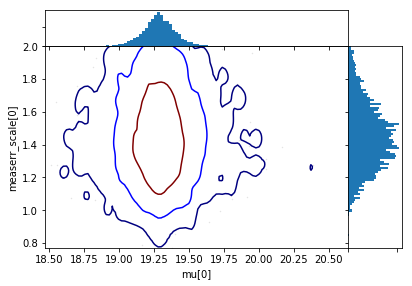

In [36]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


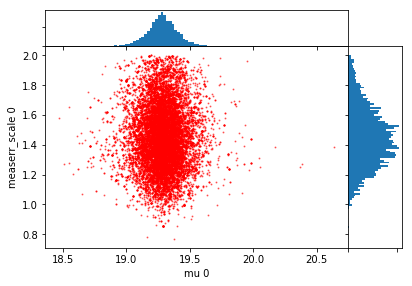

In [37]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


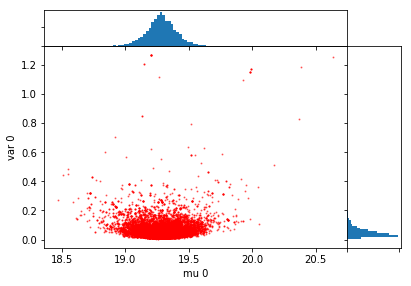

In [38]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


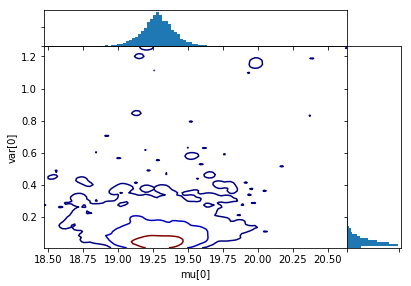

In [39]:
sample.plot_2dkde('mu', 'var', doShow=True)

Text(0.5,1,'Interpolacion, camino simulado')

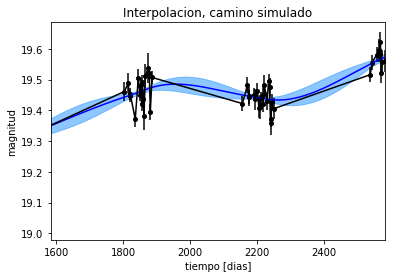

In [40]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

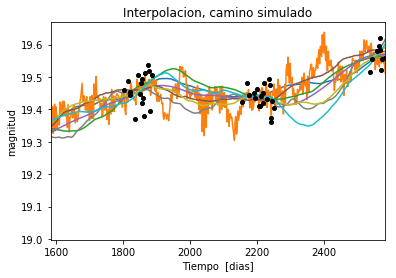

In [38]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 10
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')